In [1]:
!nproc

8


# Regression LinÃ©aire Multiple



####
# Première Etape: Importer les librairies
####

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

####
# Deuxième Etape: Importer et afficher le contenu et la structure le la dataset
####

In [4]:
# Charger la base
livraison = pd.read_csv('Livraison.csv')

livraison.shape
livraison.dtypes
livraison.head()
livraison.info()
livraison.isnull().any()
livraison.columns
livraison.columns.values
livraison.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Distance_Parcourue  10 non-null     int64  
 1   Nb_livraisons       10 non-null     int64  
 2   PrixCarburant       10 non-null     float64
 3   Duree_trajet        10 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 448.0 bytes


,Distance_Parcourue,Nb_livraisons,PrixCarburant,Duree_trajet
count,10.000000,10.000000,10.00000,10.000000
mean,79.600000,3.100000,3.51700,6.390000
std,19.995555,1.595131,0.28562,0.867243
min,44.000000,1.000000,3.03000,4.800000
25%,68.500000,2.250000,3.31500,5.800000
50%,77.500000,3.000000,3.55500,6.500000
75%,86.750000,3.750000,3.72750,7.000000
max,111.000000,6.000000,3.89000,7.400000


##########Création les matrices de variables indépendantes et dépendante ############

### Première méthode ####

In [5]:
X = livraison[['Distance_Parcourue', 'Nb_livraisons', 'PrixCarburant']]
##ou
#X = livraison.drop(['Duree_trajet'], axis = 1)
y = livraison['Duree_trajet']
y

0    7.0
1    5.4
2    6.6
3    7.4
4    4.8
5    6.4
6    7.0
7    5.6
8    7.3
9    6.4
Name: Duree_trajet, dtype: float64

### Deuxième méthode ####

In [ ]:
#X = livraison.iloc[:,:-1].values
#y = livraison.iloc[:,-1].values
#X.shape
#y.shape

(10,)

####Troisième méthode ####

In [ ]:
#data= livraison.as_matrix()

#X = data[:,0:3]

## ou
# X = np.delete(data,3,1)
#Y = data[:,3]

####
#Troisième Etape: visualiser les relations entres les variables
####

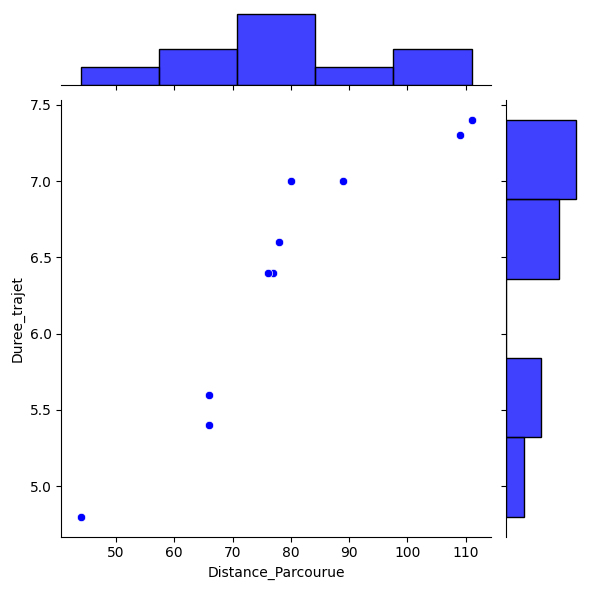

In [5]:
# VDs vs VI
sns.jointplot(x='Distance_Parcourue', y = 'Duree_trajet', data= livraison, color ='blue')

In [ ]:
sns.jointplot(x='Nb_livraisons', y = 'Duree_trajet', data= livraison, color ='blue')

In [ ]:
sns.jointplot(x='PrixCarburant', y = 'Duree_trajet', data= livraison, color ='blue')

In [ ]:
# VDs vs VDs
sns.jointplot(x='Distance_Parcourue', y = 'Nb_livraisons', data= livraison, color ='blue')


In [ ]:
sns.jointplot(x='Distance_Parcourue', y = 'PrixCarburant', data= livraison, color ='blue')

In [ ]:
sns.jointplot(x='Nb_livraisons', y = 'PrixCarburant', data= livraison, color ='blue')

In [ ]:
sns.pairplot(livraison)

Calcul de correlation

In [6]:
from scipy.stats import pearsonr, spearmanr

corr, pval = pearsonr(livraison['Distance_Parcourue'] , y)

print("corr:  ",corr, "pval:  ",pval) 

corr:   0.928178500887476 pval:   0.00010667565429896736


In [7]:
for var in livraison.columns.values:
    for var1 in livraison.columns.values:
        corr, pval = pearsonr(livraison[var] , livraison[var1])
        print(var,"  ",var1, "  ",corr, "  ",pval) 

Distance_Parcourue    Distance_Parcourue    1.0    0.0
Distance_Parcourue    Nb_livraisons    0.9558982066200347    1.5690314407660772e-05
Distance_Parcourue    PrixCarburant    0.35579623354708517    0.3129640590817896
Distance_Parcourue    Duree_trajet    0.928178500887476    0.00010667565429896736
Nb_livraisons    Distance_Parcourue    0.9558982066200347    1.5690314407660772e-05
Nb_livraisons    Nb_livraisons    1.0    0.0
Nb_livraisons    PrixCarburant    0.4982421647401633    0.142741207670319
Nb_livraisons    Duree_trajet    0.9164433964470268    0.00019260878342963056
PrixCarburant    Distance_Parcourue    0.35579623354708517    0.3129640590817896
PrixCarburant    Nb_livraisons    0.4982421647401633    0.142741207670319
PrixCarburant    PrixCarburant    1.0    0.0
PrixCarburant    Duree_trajet    0.2672115310193847    0.4554534126850813
Duree_trajet    Distance_Parcourue    0.928178500887476    0.00010667565429896736
Duree_trajet    Nb_livraisons    0.9164433964470268    0.0001

####
# Troisième Etape: Etudier les regressions simples
####

####
# 3-1: Construction du modèle à partir des données d'apprentissage
####


In [8]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.get_params()

from sklearn.metrics import median_absolute_error,mean_squared_error, mean_absolute_error, r2_score



In [9]:
#  y = a*x1 +b 
regressor.fit(X[['Distance_Parcourue']], y)

print("l'éqation de droite est y =",regressor.coef_[0], "x +",regressor.intercept_)

y_model = regressor.predict(X[['Distance_Parcourue']])
# The median absolute error MedianAE for train
print('Median absolute error: %.2f'
      % median_absolute_error(y, y_model))
# The mean absolute error MAE for train
print('Mean absolute error: %.2f'
      % mean_absolute_error(y, y_model))
# The mean squared error MSE for train
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_model))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, y_model))

l'éqation de droite est y = 0.04025678079146286 x + 3.1855602489995554
Median absolute error: 0.25
Mean absolute error: 0.27
Mean squared error: 0.09
Coefficient of determination: 0.86


In [ ]:
#y = a*x2 +b
regressor.fit(X[['Nb_livraisons']], y)
print("l'éqation de droite est y =",regressor.coef_[0], "x +",regressor.intercept_)
y_model = regressor.predict(X[['Nb_livraisons']])

# The median absolute error MedianAE for train
print('Median absolute error: %.2f'
      % median_absolute_error(y, y_model))
# The mean absolute error MAE for train
print('Mean absolute error: %.2f'
      % mean_absolute_error(y, y_model))
# The mean squared error MSE for train
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_model))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, y_model))

In [ ]:
#y = a*x3 +b
regressor.fit(X[['PrixCarburant']], y)
print("l'éqation de droite est y =",regressor.coef_[0], "x +",regressor.intercept_)
y_model = regressor.predict(X[['PrixCarburant']])

# The median absolute error MedianAE for train
print('Median absolute error: %.2f'
      % median_absolute_error(y, y_model))
# The mean absolute error MAE for train
print('Mean absolute error: %.2f'
      % mean_absolute_error(y, y_model))
# The mean squared error MSE for train
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_model))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, y_model))

In [ ]:
#y = a1*x1 + a2*x2 + a0
regressor.fit(X[['Distance_Parcourue','Nb_livraisons']],y)
print("l'éqation de droite est y =",regressor.coef_[0], "x1 +",regressor.coef_[1], "x2 +",regressor.intercept_)
y_predict = regressor.predict(X[['Distance_Parcourue','Nb_livraisons']])

from math import sqrt

from sklearn.metrics import median_absolute_error,mean_squared_error, mean_absolute_error, r2_score

k = X.shape[1]
n = len(X)

RMSE = float(format(np.sqrt(mean_squared_error(y, y_predict)) , '.3f'))
MSE = mean_squared_error(y, y_predict)
MAE = mean_absolute_error(y, y_predict)
r2 = r2_score(y, y_predict)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean( np.abs( (y-y_predict) / y  )  )*100

print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)

In [ ]:
#y = a1*x1 + a3*x3 + a0
regressor.fit(X[['Distance_Parcourue','PrixCarburant']],y)
print("l'éqation de droite est y =",regressor.coef_[0], "x1 +",regressor.coef_[1], "x2 +",regressor.intercept_)
y_predict = regressor.predict(X[['Distance_Parcourue','PrixCarburant']])

from math import sqrt

from sklearn.metrics import median_absolute_error,mean_squared_error, mean_absolute_error, r2_score

k = X.shape[1]
n = len(X)

RMSE = float(format(np.sqrt(mean_squared_error(y, y_predict)) , '.3f'))
MSE = mean_squared_error(y, y_predict)
MAE = mean_absolute_error(y, y_predict)
r2 = r2_score(y, y_predict)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean( np.abs( (y-y_predict) / y  )  )*100

print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)

In [ ]:
#y = a2*x2 + a3*x3 + a0
regressor.fit(X[['Nb_livraisons','PrixCarburant']],y)
print("l'éqation de droite est y =",regressor.coef_[0], "x1 +",regressor.coef_[1], "x2 +",regressor.intercept_)
y_predict = regressor.predict(X[['Nb_livraisons','PrixCarburant']])

from math import sqrt

from sklearn.metrics import median_absolute_error,mean_squared_error, mean_absolute_error, r2_score

k = X.shape[1]
n = len(X)

RMSE = float(format(np.sqrt(mean_squared_error(y, y_predict)) , '.3f'))
MSE = mean_squared_error(y, y_predict)
MAE = mean_absolute_error(y, y_predict)
r2 = r2_score(y, y_predict)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean( np.abs( (y-y_predict) / y  )  )*100

print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)

In [ ]:
#y = a1*x1 + a2*x2 + a3*x3 + a0
regressor.fit(X[['Distance_Parcourue','Nb_livraisons','PrixCarburant']],y)
print("l'éqation de droite est y =",regressor.coef_[0], "x1 +",regressor.coef_[1], "x2 +",regressor.coef_[2], "x3 +",regressor.intercept_)
y_predict = regressor.predict(X[['Distance_Parcourue','Nb_livraisons','PrixCarburant']])

from math import sqrt

from sklearn.metrics import median_absolute_error,mean_squared_error, mean_absolute_error, r2_score

k = X.shape[1]
n = len(X)

RMSE = float(format(np.sqrt(mean_squared_error(y, y_predict)) , '.3f'))
MSE = mean_squared_error(y, y_predict)
MAE = mean_absolute_error(y, y_predict)
r2 = r2_score(y, y_predict)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean( np.abs( (y-y_predict) / y  )  )*100

print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)

#y =  a1x1 + a0

#y =  a2x2 + a0

#y =  a3x3 + a0

#y =  a1x1 + a2x2 +a0

#y =  a1x1 + a3x3 +a0

#y =  a2x2 + a3x3 +a0

#y =  a1x1 + a2x2 +a3x3 + a0


In [32]:
from math import sqrt

from sklearn.metrics import median_absolute_error,mean_squared_error, mean_absolute_error, r2_score

In [ ]:
import statsmodels.formula.api as smf

model1=smf.ols(formula='Duree_trajet~Distance_Parcourue',data=livraison).fit()

print(model1.params)
print(model1.pvalues)
print(model1.rsquared)
print(model1.summary())


In [ ]:
y_predict = model1.predict(livraison[['Distance_Parcourue']])

k = X.shape[1]
n = len(X)

RMSE = float(format(np.sqrt(mean_squared_error(y, y_predict)) , '.3f'))
MSE = mean_squared_error(y, y_predict)
MAE = mean_absolute_error(y, y_predict)
r2 = r2_score(y, y_predict)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean( np.abs( (y-y_predict) / y  )  )*100

print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)

In [ ]:
model2=smf.ols(formula='Duree_trajet~Nb_livraisons',data=livraison).fit()

print(model2.params)
print(model2.pvalues)
print(model2.rsquared)
print(model2.summary())


In [ ]:
y_predict = model2.predict(livraison[['Nb_livraisons']])

k = X.shape[1]
n = len(X)

RMSE = float(format(np.sqrt(mean_squared_error(y, y_predict)) , '.3f'))
MSE = mean_squared_error(y, y_predict)
MAE = mean_absolute_error(y, y_predict)
r2 = r2_score(y, y_predict)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean( np.abs( (y-y_predict) / y  )  )*100

print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)

In [ ]:
model3=smf.ols(formula='Duree_trajet~PrixCarburant',data=livraison).fit()

print(model3.params)
print(model3.pvalues)
print(model3.rsquared)
print(model3.summary())

In [ ]:
y_predict = model3.predict(livraison[['PrixCarburant']])

k = X.shape[1]
n = len(X)

RMSE = float(format(np.sqrt(mean_squared_error(y, y_predict)) , '.3f'))
MSE = mean_squared_error(y, y_predict)
MAE = mean_absolute_error(y, y_predict)
r2 = r2_score(y, y_predict)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean( np.abs( (y-y_predict) / y  )  )*100

print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)

In [ ]:
model4=smf.ols(formula='Duree_trajet~Distance_Parcourue+Nb_livraisons',data=livraison).fit()

print(model4.params)
print(model4.pvalues)
print(model4.rsquared)
print(model4.summary())

In [ ]:
y_predict = model4.predict(livraison[['Distance_Parcourue','Nb_livraisons']])

k = X.shape[1]
n = len(X)

RMSE = float(format(np.sqrt(mean_squared_error(y, y_predict)) , '.3f'))
MSE = mean_squared_error(y, y_predict)
MAE = mean_absolute_error(y, y_predict)
r2 = r2_score(y, y_predict)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean( np.abs( (y-y_predict) / y  )  )*100

print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)

In [ ]:
model5=smf.ols(formula='Duree_trajet~Distance_Parcourue+PrixCarburant',data=livraison).fit()

print(model5.params)
print(model5.pvalues)
print(model5.rsquared)
print(model5.summary())

In [ ]:
y_predict = model5.predict(livraison[['Distance_Parcourue','PrixCarburant']])

k = X.shape[1]
n = len(X)

RMSE = float(format(np.sqrt(mean_squared_error(y, y_predict)) , '.3f'))
MSE = mean_squared_error(y, y_predict)
MAE = mean_absolute_error(y, y_predict)
r2 = r2_score(y, y_predict)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean( np.abs( (y-y_predict) / y  )  )*100

print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)

In [ ]:
model6=smf.ols(formula='Duree_trajet~Nb_livraisons+PrixCarburant',data=livraison).fit()

print(model6.params)
print(model6.pvalues)
print(model6.rsquared)
print(model6.summary())

In [ ]:
y_predict = model6.predict(livraison[['Nb_livraisons','PrixCarburant']])

k = X.shape[1]
n = len(X)

RMSE = float(format(np.sqrt(mean_squared_error(y, y_predict)) , '.3f'))
MSE = mean_squared_error(y, y_predict)
MAE = mean_absolute_error(y, y_predict)
r2 = r2_score(y, y_predict)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean( np.abs( (y-y_predict) / y  )  )*100

print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)

In [ ]:
model7=smf.ols(formula='Duree_trajet~Distance_Parcourue+Nb_livraisons+PrixCarburant',data=livraison).fit()

print(model7.params)
print(model7.pvalues)
print(model7.rsquared)
print(model7.summary())

In [ ]:
y_predict = model7.predict(livraison[['Distance_Parcourue','Nb_livraisons','PrixCarburant']])

from math import sqrt

from sklearn.metrics import median_absolute_error,mean_squared_error, mean_absolute_error, r2_score

k = X.shape[1]
n = len(X)

RMSE = float(format(np.sqrt(mean_squared_error(y, y_predict)) , '.3f'))
MSE = mean_squared_error(y, y_predict)
MAE = mean_absolute_error(y, y_predict)
r2 = r2_score(y, y_predict)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean( np.abs( (y-y_predict) / y  )  )*100

print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)